In [ ]:
from google.colab import files
import pandas as pd
from math import*

In [ ]:
files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (1).csv


{'Sleep_health_and_lifestyle_dataset (1).csv': b'Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder\r\n1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None\r\n2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None\r\n3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None\r\n4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea\r\n5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea\r\n6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia\r\n7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia\r\n8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None\r\n9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None\r\n10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None\r\n11,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,None\r\n12,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None\r\n13,Male

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

Вывод первых 10 строк таблицы

In [ ]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


Функция определения коэффициента корреляции Пирсона и Кендела

In [ ]:
def pirson(first_column, second_column):
    global average_x, average_y, non, summ_down_f, summ_down_s, s, kendal
    rez = []
    s, summ_up, summ_down_f, summ_down_s = 0, 0, 0, 0
    average_x = sum(first_column) / len(first_column)   #Среднее арифметическое, оно же мат. ожидание для 1-ого столбца
    #print(average_x)
    average_y = sum(second_column) / len(second_column) #Среднее арифметическое, оно же мат. ожидание для 2-ого столбца
    #print(average_y)
    non = float(len(second_column))
    p_x = []
    p_y = []
    for i in range(len(first_column)):
        sign_x = 0
        sign_y = 0
        row = []
        m_x = first_column[i] - average_x
        m_y = second_column[i] - average_y
        summ_up += m_x * m_y
        summ_down_f += m_x**2 #(x- Mx)**2
        summ_down_s += m_y**2 #(y- My)**2
        d_x = (1/non*summ_down_f)**(1/2)
        #print('first_column[i] =', first_column[i])
        a = e**(-e**(1.283*(average_x - first_column[i])/d_x - 0.5778))
        p_x.append(a)
        d_y = (1/non*summ_down_s)**(1/2)
        b = e**(-e**(1.283*(average_y - second_column[i])/d_y - 0.5778))
        p_y.append(b)
        for j in range(len(first_column)):
            m = first_column[j]-first_column[i]
            n = second_column[j] - second_column[i]
            if i >= j:
                multi_t = 0
                row.append(multi_t)
                continue
            if m > 0:
                sign_x = 1
            if n > 0:
                sign_y = 1
            if m == 0:
                sign_x = 0
            if n == 0:
                sign_y = 0
            if n < 0:
                sign_y = -1
            if m < 0:
                sign_x = -1
            multi_t = sign_x*sign_y
            s += multi_t
            sign_x = 0
            sign_y = 0
            row.append(multi_t)
        rez.append(row)
    #print(rez)
    kendal = s*2/(non*(non-1))
    #print('tau_kendal =', str(round(kendal, 4)))
    tau = (summ_up)/((summ_down_f * summ_down_s)**(1/2))
    #print(summ_up)
    #print(summ_down_f)
    #print(summ_down_s)
    #print('tau =', str(round(tau, 4)))#Пирсон
    return tau




Функция определения коэффициента корреляции Спирмена

In [ ]:
def spirman(first_column, second_column):
  p_x = []
  p_y = []
  for i in range(len(first_column)):
    d_x = (1/non*summ_down_f)**(1/2)
    #print('first_column[i] =', first_column[i])
    a = e**(-e**(1.283*(average_x - first_column[i])/d_x - 0.5778))
    p_x.append(a)
    d_y = (1/non*summ_down_s)**(1/2)
    b = e**(-e**(1.283*(average_y - second_column[i])/d_y - 0.5778))
    p_y.append(b)
  tau_spirman = pirson(p_x, p_y)
  #print('tau_spirman =', tau_spirman)
  #print('a =', a)
  #print('b =', b)
  #print('tau_spirman =', str(round(tau_spirman, 4)))
  #print(tau_spirman)
  #print(p_x)
  #print(p_y)
  return  tau_spirman

Результирующая функция, автоматически вызывающая остальные функции расчета коэффициентов корреляции

In [ ]:
def analysis(one, two):
  print('Коэффициент корреляции Пирсона - ', str(round(pirson(one, two), 4)))
  print('Коэффициент корреляции Кендала - ', str(round(kendal, 4)))
  print('Коэффициент корреляции Спирмена - ', str(round(spirman(one, two), 4)))
  plt.scatter(one, two)


Анализ данных №1

Коэффициент корреляции Пирсона -  0.137
Коэффициент корреляции Кендала -  0.1258
Коэффициент корреляции Спирмена -  0.1497


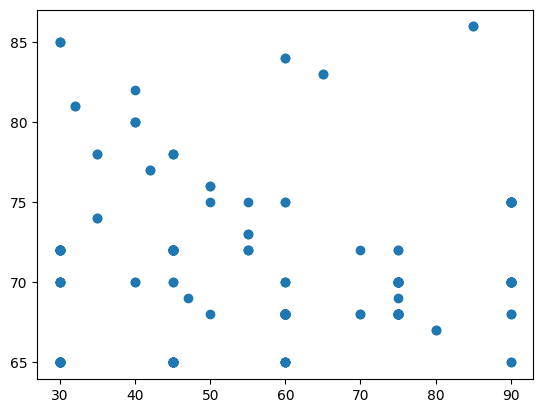

In [ ]:
analysis(df['Physical Activity Level'], df['Heart Rate'])

Гипотеза №1: Физическая активность влияет на пульс сердцебиения испытуемых на 15%.

Анализ данных №2

Коэффициент корреляции Пирсона -  0.67
Коэффициент корреляции Кендала -  0.5899
Коэффициент корреляции Спирмена -  0.8196


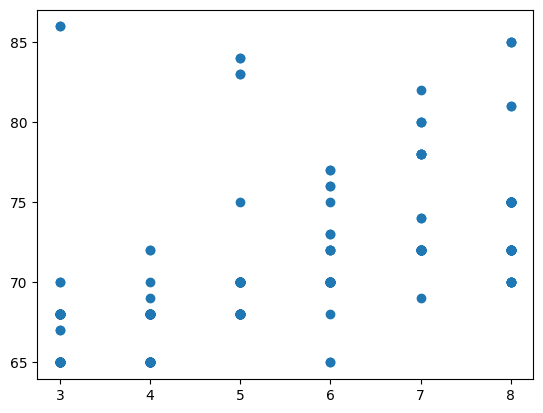

In [ ]:
analysis(df['Stress Level'], df['Heart Rate'])

Гипотеза №2: Общий уровень стресса испытуемых влияет на увеличение пульса сердцебиения на 82%.

Анализ данных №3

Коэффициент корреляции Пирсона -  -0.811
Коэффициент корреляции Кендала -  -0.5816
Коэффициент корреляции Спирмена -  -0.7372


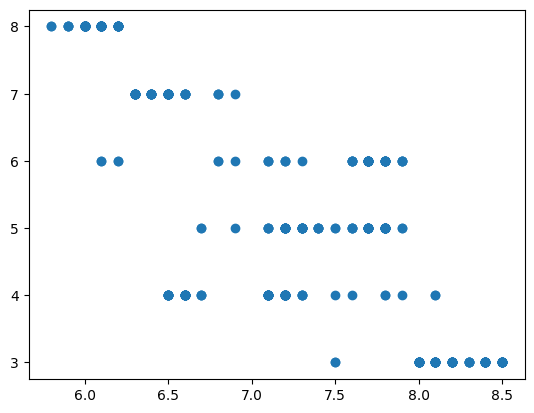

In [ ]:
analysis(df['Sleep Duration'], df['Stress Level'])

Гипотеза №3: Увеличение продолжительности сна на 81% снижает общий уровень стресса испытуемых.